# Supply Chain - Group Project 

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import datetime as dt

## Dataset - ETL

In [2]:
# reading the dataset - occupancy of a train
df = pd.read_csv('Occupancy_train.csv')

In [3]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      150 non-null    int64  
 1   Time                            150 non-null    object 
 2   Total Occupancy rate (percent)  150 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.6+ KB


In [4]:
df.drop(df.columns[0], axis=1,inplace=True) # drop unwanted columns
df.columns = ['date','occupancy'] # set column names
df.head() # preview of dataset

,date,occupancy
0,1999M01,43.7
1,1999M02,41.0
2,1999M03,36.5
3,1999M04,32.8
4,1999M05,24.5


In [5]:
df['date'] = df['date'].apply(lambda x: dt.datetime.strptime(x, "%YM%m")) # change format of date column
df

,date,occupancy
0,1999-01-01,43.7
1,1999-02-01,41.0
2,1999-03-01,36.5
3,1999-04-01,32.8
4,1999-05-01,24.5
...,...,...
145,2011-02-01,47.8
146,2011-03-01,42.6
147,2011-04-01,37.7
148,2011-05-01,29.6


In [6]:
df = df.set_index('date') # set date as index

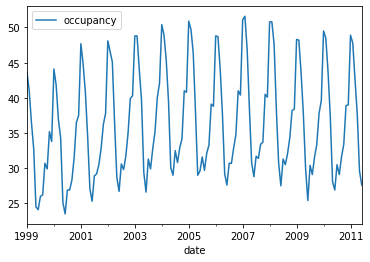

In [7]:
df.plot()

## Seasonal Decomposition


In [8]:
# import necessary libraries
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib import pylab
from pylab import rcParams

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


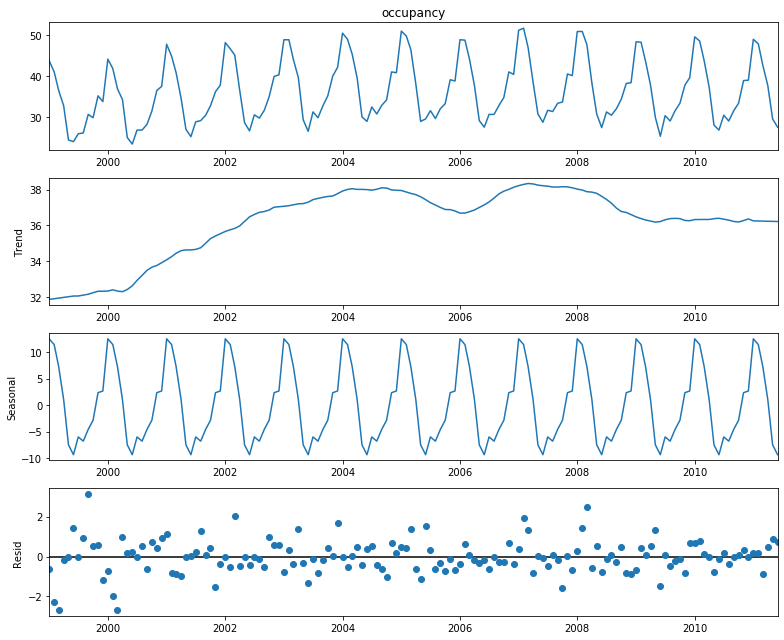

In [9]:
# additive seasonal decomposition
rcParams['figure.figsize']= 11,9
decomp_add = sm.tsa.seasonal_decompose(df['occupancy'], model='additive', extrapolate_trend='freq', freq = 12)
fig = decomp_add.plot()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


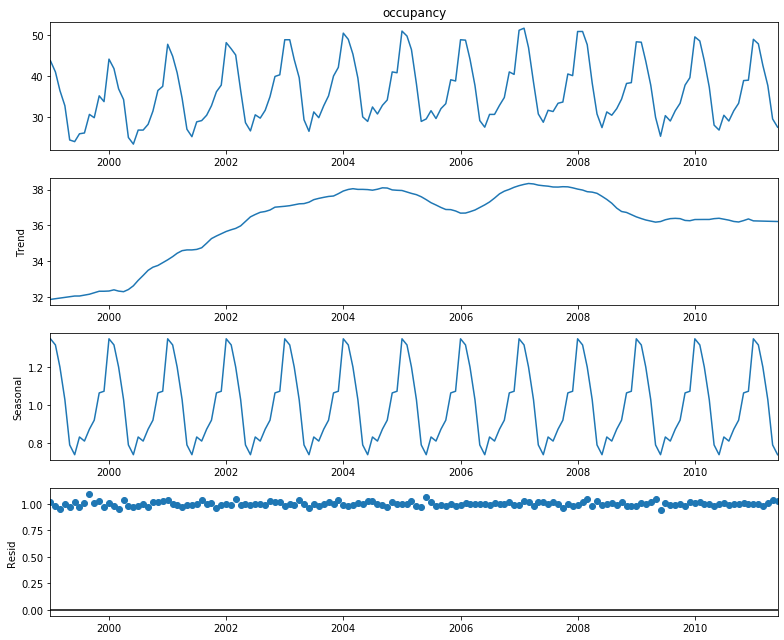

In [10]:
# multiplicative seasonal decomposition
rcParams['figure.figsize']= 11,9
decomp_mul = sm.tsa.seasonal_decompose(df['occupancy'], model='multiplicative', extrapolate_trend='freq', freq = 12)
fig = decomp_mul.plot()
plt.show()

In [11]:
# dataframe containing all the seasonal components - additive
pd.concat([decomp_add.seasonal, decomp_add.trend, decomp_add.resid, decomp_add.observed], axis=1)

,seasonal,trend,resid,occupancy
date,,,,
1999-01-01,12.484765,31.860023,-0.644789,43.7
1999-02-01,11.389460,31.897829,-2.287289,41.0
1999-03-01,7.244154,31.935635,-2.679789,36.5
1999-04-01,1.012310,31.973441,-0.185751,32.8
1999-05-01,-7.497739,32.011247,-0.013508,24.5
...,...,...,...,...
2011-02-01,11.389460,36.247407,0.163134,47.8
2011-03-01,7.244154,36.240239,-0.884393,42.6
2011-04-01,1.012310,36.233071,0.454619,37.7


In [12]:
# dataframe containing all the seasonal components - multiplicative
pd.concat([decomp_mul.seasonal, decomp_mul.trend, decomp_mul.resid, decomp_mul.observed], axis=1)

,seasonal,trend,resid,occupancy
date,,,,
1999-01-01,1.346874,31.860023,1.018377,43.7
1999-02-01,1.314760,31.897829,0.977634,41.0
1999-03-01,1.199133,31.935635,0.953125,36.5
1999-04-01,1.028141,31.973441,0.997773,32.8
1999-05-01,0.791971,32.011247,0.966393,24.5
...,...,...,...,...
2011-02-01,1.314760,36.247407,1.003008,47.8
2011-03-01,1.199133,36.240239,0.980283,42.6
2011-04-01,1.028141,36.233071,1.012007,37.7


By observing the dataframe, we can say that the data doesnt have a steady trend associated. It is also of type 'additive'

## Time Series Forecasting

### Moving Average

In [13]:
df_ma = df.copy() # make a copy of dataframe

In [14]:
# calculate moving averages with certain windows - n = 4 to 12
for i in range(4,12,2):
    colName = 'SMA_{0}'
    df_ma[colName.format(i)] = df_ma.occupancy.rolling(i, min_periods=1).mean()
   

In [15]:
df_ma.head(5) # dataframe preview

,occupancy,SMA_4,SMA_6,SMA_8,SMA_10
date,,,,,
1999-01-01,43.7,43.70,43.70,43.70,43.70
1999-02-01,41.0,42.35,42.35,42.35,42.35
1999-03-01,36.5,40.40,40.40,40.40,40.40
1999-04-01,32.8,38.50,38.50,38.50,38.50
1999-05-01,24.5,33.70,35.70,35.70,35.70


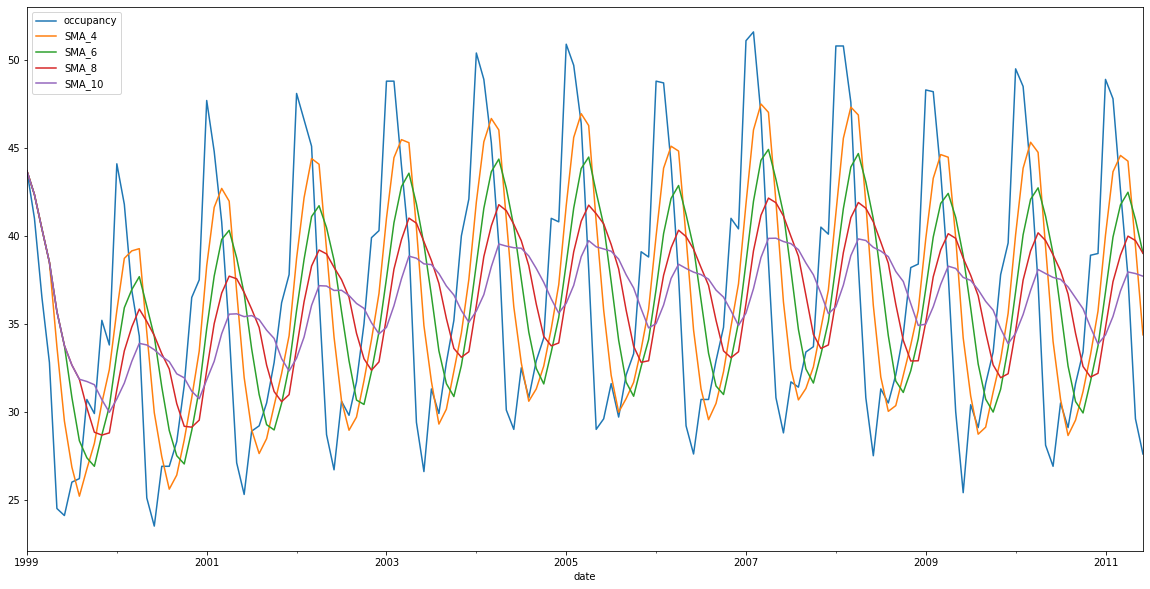

In [16]:
df_ma.plot(figsize=(20,10)) # plot various moving averages calculated alongside original

In [17]:
#calculating mean absolute percentage (MAPE)
#MAPE can be used as an indicator of accuracy
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [18]:
#calculate error factor
df_ma['Err_4']=df_ma['occupancy']-df_ma['SMA_4']
df_ma

,occupancy,SMA_4,SMA_6,SMA_8,SMA_10,Err_4
date,,,,,,
1999-01-01,43.7,43.700,43.700000,43.7000,43.70,0.000
1999-02-01,41.0,42.350,42.350000,42.3500,42.35,-1.350
1999-03-01,36.5,40.400,40.400000,40.4000,40.40,-3.900
1999-04-01,32.8,38.500,38.500000,38.5000,38.50,-5.700
1999-05-01,24.5,33.700,35.700000,35.7000,35.70,-9.200
...,...,...,...,...,...,...
2011-02-01,47.8,43.650,39.933333,37.4000,35.42,4.150
2011-03-01,42.6,44.575,41.766667,38.9125,36.87,-1.975
2011-04-01,37.7,44.250,42.483333,39.9875,37.95,-6.550


In [19]:
#calculate MAE, RMSE and MSE for MA 4
MAE = df_ma["Err_4"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df_ma["Err_4"]**2).mean())
print("RMSE:",round(RMSE,2))
MSE= (df_ma["Err_4"]**2).mean()
print("MSE:",round(MSE,2))
print("MAPE:",mean_absolute_percentage_error(df_ma['occupancy'],df_ma['SMA_4']))

MAE: 4.48
RMSE: 5.56
MSE: 30.87
MAPE: 12.840979192950428


### Exponential Smoothing

In [20]:
df.head(5) # preview of dataframe

,occupancy
date,
1999-01-01,43.7
1999-02-01,41.0
1999-03-01,36.5
1999-04-01,32.8
1999-05-01,24.5


In [21]:
#using dicky-fuller test to determine if data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['occupancy'])
print(result)

(-2.6891207587273778, 0.07593984723697007, 14, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, 438.69462080667455)


In [23]:
df_diff = df.diff(1).dropna() #shifting data based on seasonality breakdown

In [24]:
df_diff.head(5) # preview of dataframe

,occupancy
date,
1999-02-01,-2.7
1999-03-01,-4.5
1999-04-01,-3.7
1999-05-01,-8.3
1999-06-01,-0.4


In [25]:
#using dicky-fuller test to determine if data is stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_diff['occupancy'])
print(result)

(-3.0313043258996486, 0.03207259461734542, 13, 135, {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}, 441.0109883891392)


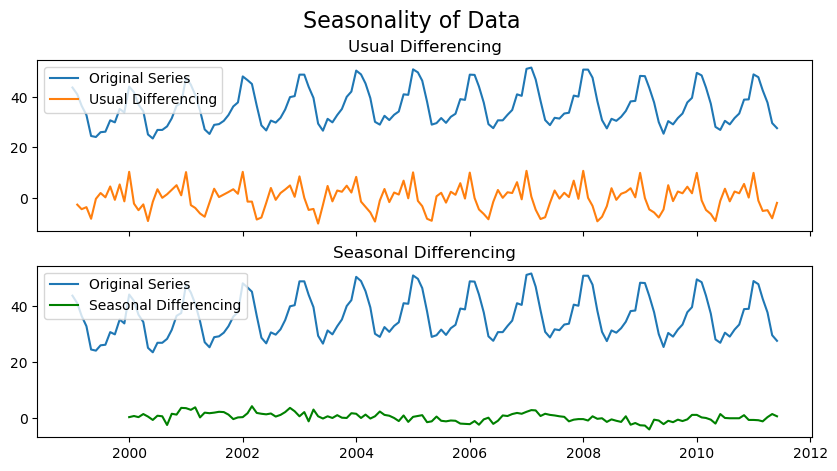

In [26]:
# Plot for comparing seasonal and usual differencing
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(df[:], label='Original Series')
axes[0].plot(df[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(df[:], label='Original Series')
axes[1].plot(df[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
axes[1].legend(loc='upper left', fontsize=10)

plt.suptitle('Seasonality of Data', fontsize=16)
plt.show()

In [27]:
len(df_diff.index)

149

In [28]:
#splitting the data into test and train splits in the ratio of 80:20
train=df_diff[0:-30] 
test=df_diff[-30:]
print(train.shape)
print(test.shape)

(119, 1)
(30, 1)


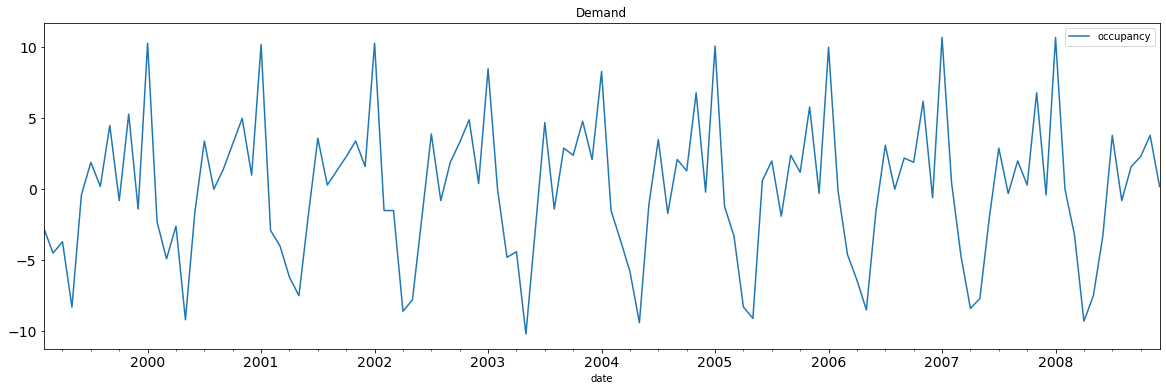

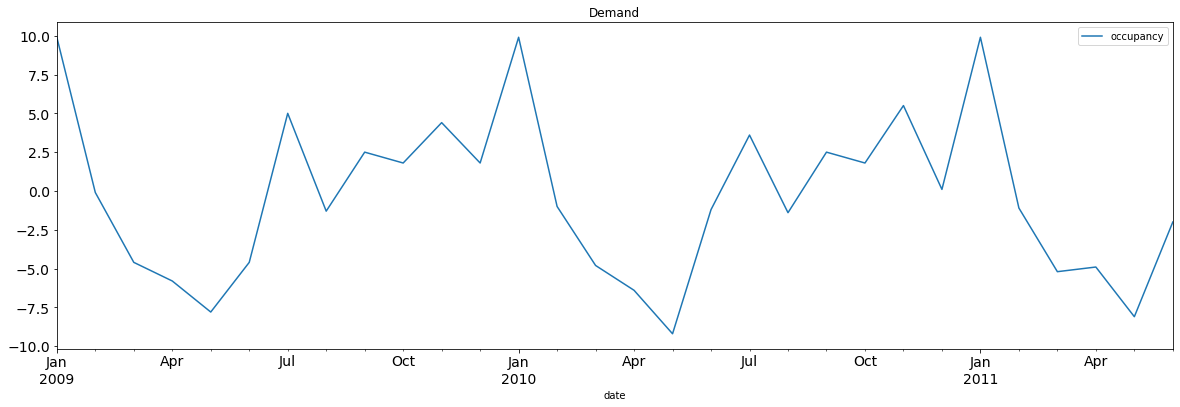

In [29]:
# plot test and train sets
train.plot(figsize=(20,6), title= 'Demand', fontsize=14)
test.plot(figsize=(20,6), title= 'Demand', fontsize=14)
plt.show()

In [30]:
# import required libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [80]:
# Fit the model - triple exponential smoothing using additive seasonality.
pred = test.copy()
# Modelling using train data
fit_tes = ExponentialSmoothing(np.asarray(train),seasonal_periods=12 ,trend='add', seasonal='add').fit()
# Forecasting using test data
pred['Holt_Winter'] = fit_tes.forecast(len(test))
# Calculate KPI's

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

MAE 0.99
MSE 1.78
RMSE 1.33
MAPE: 57.55005796947753


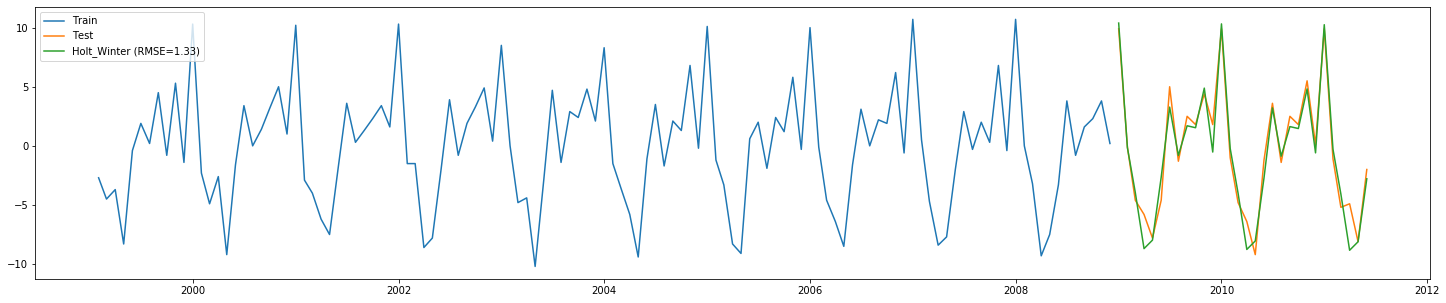

In [32]:
# calculate evaluation metrics for measuring performance
mae = mean_absolute_error(test.occupancy, pred.Holt_Winter)
mse=mean_squared_error(test.occupancy, pred.Holt_Winter)
rmse = sqrt(mean_squared_error(test.occupancy, pred.Holt_Winter))
print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))
print("MAPE:",mean_absolute_percentage_error(test.occupancy,pred.Holt_Winter))

# Plot actual(test, train) and predicted data
plt.figure(figsize=(25,5))
plt.plot( train['occupancy'], label='Train')
plt.plot(test['occupancy'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()

### ARIMA

In [33]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

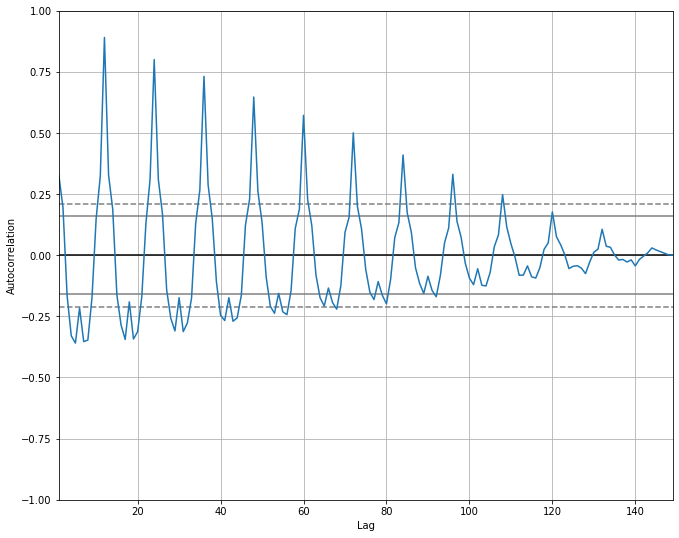

In [34]:
# plotting the autocorrelation function using the modified data
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_diff.occupancy)
plt.show()

D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
D:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


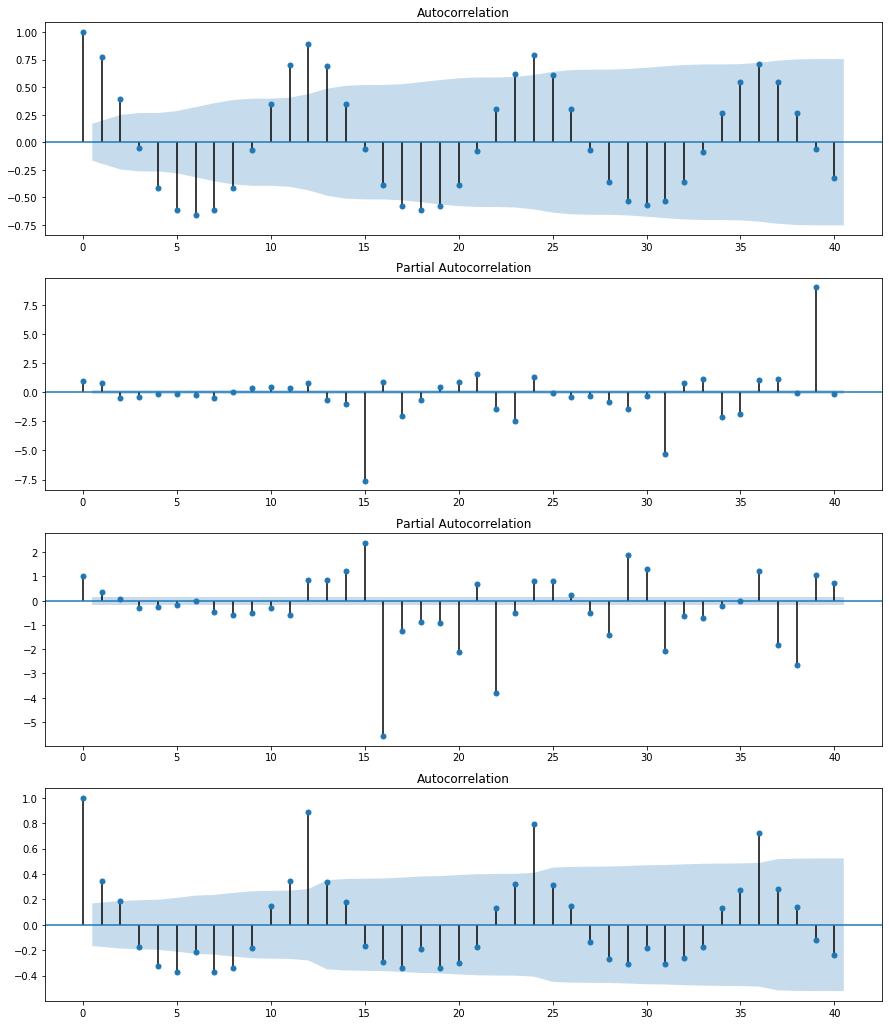

In [35]:
# plotting ACF and PACF plots till 40 lags
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(15,18))
ax1 = fig.add_subplot(411)
fig = sm.graphics.tsa.plot_acf(df['occupancy'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(412)
fig = sm.graphics.tsa.plot_pacf(df['occupancy'].iloc[13:],lags=40,ax=ax2)
ax3 = fig.add_subplot(413)
fig = sm.graphics.tsa.plot_pacf(df_diff['occupancy'].iloc[13:],lags=40,ax=ax3)
ax4 = fig.add_subplot(414)
fig = sm.graphics.tsa.plot_acf(df_diff['occupancy'].iloc[13:],lags=40,ax=ax4)

In [36]:
# Using auto arima for identifying the ideal hyperparameters - p, q and d
import pmdarima as pm

smodel = pm.auto_arima(df.occupancy, start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)
smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=416.145, Time=0.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=476.500, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=434.325, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=414.296, Time=0.20 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=438.392, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=413.383, Time=0.38 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=425.433, Time=0.12 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=416.141, Time=0.55 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=414.067, Time=0.66 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=413.117, Time=0.49 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=414.443, Time=0.74 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=414.666, Time=0.52 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=422.613, Time=0.46 sec
 ARIMA(1,1,2)(0,1,2)[12]             

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  150
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -202.559
Date:                                 Mon, 12 Apr 2021   AIC                            413.117
Time:                                         19:16:34   BIC                            424.797
Sample:                                              0   HQIC                           417.864
                                                 - 150                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5824      0.064     -9.108      0.000      -0.708      -0.457
ma.S.L12      -0.5353      0.098     -5.463      0.000      -0.727      -0.343
ma.S.L24      -0.2139      0.105     -2.035      0.042      -0.420      -0.008
sigma2         1.0551      0.126      8.354      0.000       0.808       1.303
===================================================================================
Ljung-Box (Q):                       47.47   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.19   Prob(JB):                         0.64
Heteroskedasticity (H):               0.52   Skew:                             0.15
Prob(H) (two-sided):                  0.03   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#importing SARIMAX libraries for implementing seasonal ARIMA 
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Build the model using ideal hyperparameters - (0,1,1)(0,1,2)[12]  
model = SARIMAX(df, order=(0, 1, 1), seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False, dynamic =True)
# Fitting the model
model_fit = model.fit()
# Model summary
model_fit.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               occupancy   No. Observations:                  150
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -150.097
Date:                                 Mon, 12 Apr 2021   AIC                            308.195
Time:                                         19:16:35   BIC                            319.033
Sample:                                     01-01-1999   HQIC                           312.592
                                          - 06-01-2011                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6055      0.069     -8.736      0.000      -0.741      -0.470
ma.S.L12      -0.5809      0.105     -5.554      0.000      -0.786      -0.376
ma.S.L24      -0.2196      0.106     -2.078      0.038      -0.427      -0.013
sigma2         0.8249      0.135      6.107      0.000       0.560       1.090
===================================================================================
Ljung-Box (Q):                       25.33   Jarque-Bera (JB):                 2.16
Prob(Q):                              0.97   Prob(JB):                         0.34
Heteroskedasticity (H):               0.80   Skew:                            -0.04
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

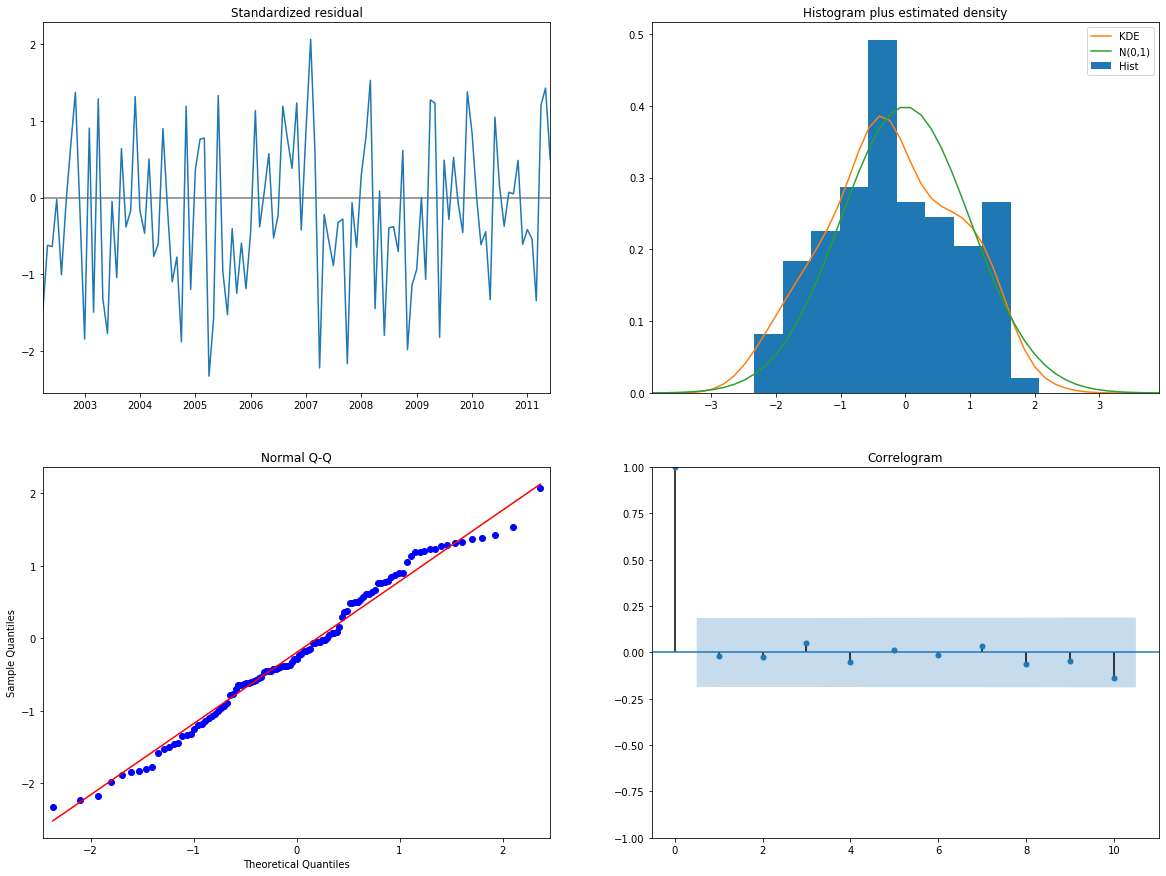

In [38]:
# Create the 4 diagostics plots
model_fit.plot_diagnostics(figsize=(20,15))
plt.show()

### One step Forecast

In [39]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-1)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower occupancy']
upper_limits = confidence_intervals.loc[:,'upper occupancy']

# Print best estimate predictions
print(mean_forecast)

2011-06-01    27.149711
Freq: MS, dtype: float64


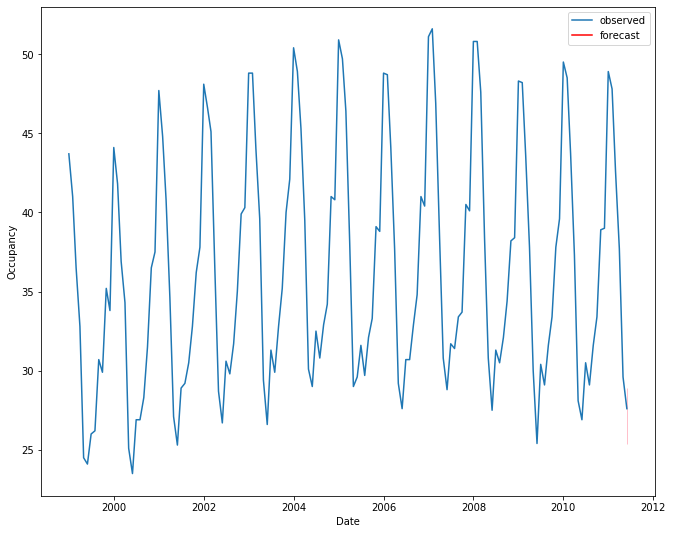

In [40]:
# plot the  data
fig = plt.figure((0,1,1)(0,1,2)[12])
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

### General Dynamic Prediction

In [41]:
# Generate predictions
one_step_forecast = model_fit.get_prediction(start=-12, dynamic = True)

# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean

# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()

confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower occupancy']
upper_limits = confidence_intervals.loc[:,'upper occupancy']

# Print best estimate predictions
print(mean_forecast)

2010-07-01    30.352489
2010-08-01    29.383793
2010-09-01    31.614282
2010-10-01    33.409303
2010-11-01    38.493147
2010-12-01    39.417343
2011-01-01    49.361768
2011-02-01    48.523729
2011-03-01    44.252277
2011-04-01    37.510305
2011-05-01    28.774774
2011-06-01    27.112371
Freq: MS, dtype: float64


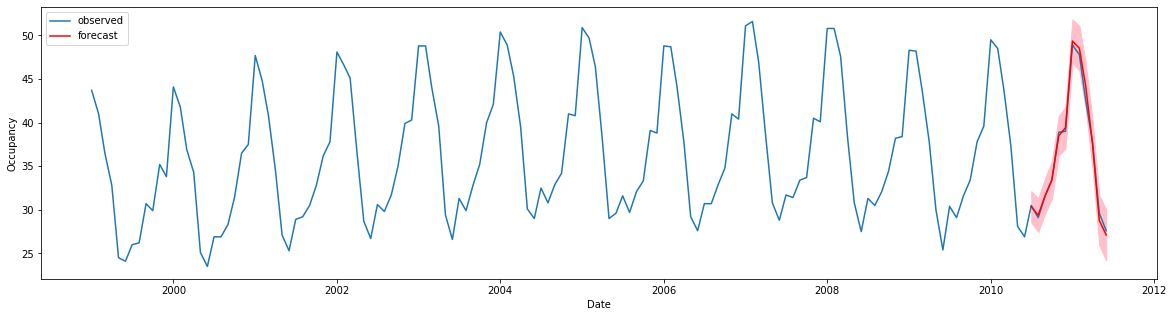

In [42]:
# plot the  data
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

### out of sample

In [43]:
forecast = model_fit.get_forecast(steps =12)
mean_forecast= forecast.predicted_mean
confidence_intervals= forecast.conf_int()
confidence_intervals
# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower occupancy']
upper_limits = confidence_intervals.loc[:,'upper occupancy']

# Print best estimate predictions
print(mean_forecast)

2011-07-01    30.859920
2011-08-01    29.822785
2011-09-01    32.029932
2011-10-01    33.903548
2011-11-01    39.247192
2011-12-01    39.492007
2012-01-01    49.415908
2012-02-01    48.571130
2012-03-01    44.025928
2012-04-01    38.079744
2012-05-01    29.824670
2012-06-01    27.650314
Freq: MS, dtype: float64


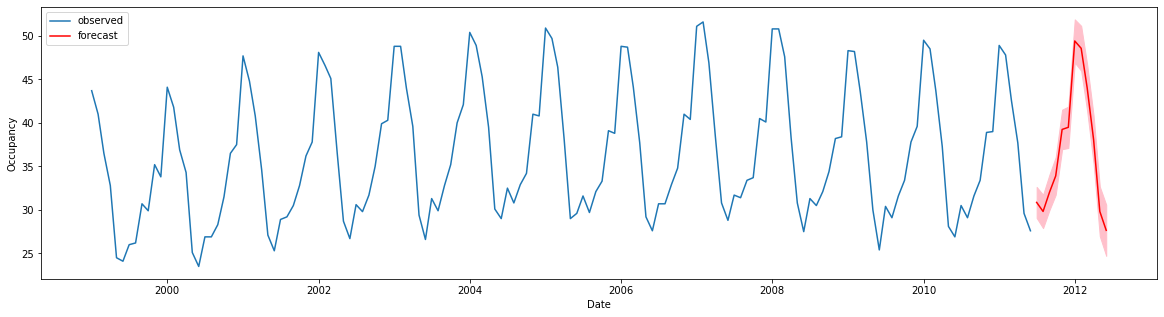

In [44]:
# plot the  data
fig = plt.figure(figsize=(20,5))
plt.plot(df.index, df, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

# shade the area between your confidence limits
plt.fill_between(lower_limits.index, lower_limits, 
               upper_limits, color='pink')

# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('Occupancy')
plt.legend()
plt.show()

### Machine Learning

In [45]:
import math # importing libaries

In [46]:
df.head() # preview of dataset

,occupancy
date,
1999-01-01,43.7
1999-02-01,41.0
1999-03-01,36.5
1999-04-01,32.8
1999-05-01,24.5


#### Data Preparation

In [47]:
df_temp = pd.DataFrame() # create a temporary dataframe

In [48]:
for i in range(12,0,-1):
     df_temp[['t-'+str(i)]] = df.shift(i)  # Creating 12 lag values for predicting observations

In [49]:
df_temp['t'] = df.values

In [50]:
df_temp

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
1999-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.7
1999-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.7,41.0
1999-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.7,41.0,36.5
1999-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.7,41.0,36.5,32.8
1999-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.7,41.0,36.5,32.8,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-01,48.5,43.7,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8
2011-03-01,43.7,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8,42.6
2011-04-01,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8,42.6,37.7


In [51]:
df_ml = df_temp[12:]

In [52]:
df_ml

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
2000-01-01,43.7,41.0,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1
2000-02-01,41.0,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8
2000-03-01,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9
2000-04-01,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9,34.3
2000-05-01,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9,34.3,25.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-02-01,48.5,43.7,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8
2011-03-01,43.7,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8,42.6
2011-04-01,37.3,28.1,26.9,30.5,29.1,31.6,33.4,38.9,39.0,48.9,47.8,42.6,37.7


In [53]:

df_ml.head(5)

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
date,,,,,,,,,,,,,
2000-01-01,43.7,41.0,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1
2000-02-01,41.0,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8
2000-03-01,36.5,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9
2000-04-01,32.8,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9,34.3
2000-05-01,24.5,24.1,26.0,26.2,30.7,29.9,35.2,33.8,44.1,41.8,36.9,34.3,25.1


In [54]:
# splitting the data into feature and target variables
occ = df_ml.values
X= occ[:,0:-1]
y = occ[:,-1]

In [55]:
# shape of data
print(X.shape)
print(y.shape)

(138, 12)
(138,)


#### Splitting in the ratio of 80-20


In [56]:
ratio = 0.8 # 80-20 ratio
Y = y
traintarget_size = int(len(Y) * ratio)   # Set split
print(traintarget_size)
train_target, test_target = Y[:traintarget_size], Y[traintarget_size:len(Y)]

110


In [57]:
# print observations - target
print('Observations for Target: %d' % (len(Y)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 138
Training Observations for Target: 110
Testing Observations for Target: 28


In [58]:
# print observations - feature
trainfeature_size = int(len(X) * ratio)
train_feature, test_feature = X[:trainfeature_size], X[trainfeature_size:len(X)]
print('Observations for feature: %d' % (len(X)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 138
Training Observations for feature: 110
Testing Observations for feature: 28


In [59]:
train_feature

array([[43.7, 41. , 36.5, ..., 29.9, 35.2, 33.8],
       [41. , 36.5, 32.8, ..., 35.2, 33.8, 44.1],
       [36.5, 32.8, 24.5, ..., 33.8, 44.1, 41.8],
       ...,
       [40.1, 50.8, 50.8, ..., 32.1, 34.4, 38.2],
       [50.8, 50.8, 47.6, ..., 34.4, 38.2, 38.4],
       [50.8, 47.6, 38.3, ..., 38.2, 38.4, 48.3]])

#### Decision Tree

In [60]:
# Decision Tree Modelling
from sklearn.tree import DecisionTreeRegressor

# Defining the model
decision_tree = DecisionTreeRegressor() # default parameters

# Fitting the model with train part of target and feature data
decision_tree.fit(train_feature, train_target)

# Printing the accuracy scores
print(decision_tree.score(train_feature, train_target))
print(decision_tree.score(test_feature,test_target))


1.0
0.9569742996254168


In [61]:
# Find Best Max Depth

# Loop through a few different max depths and check the performance
# Try different max depths. We want to optimize our ML models to make the best predictions possible.
# For regular decision trees, max_depth, which is a hyperparameter, limits the number of splits in a tree.
# You can find the best value of max_depth based on the R-squared score of the model on the test set.
score_df = []

for d in range(2,21):
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_feature, train_target)

    # Print out the scores on train and test
#     print('max_depth=', str(d))
    tr_score = decision_tree.score(train_feature, train_target)
    ts_score = decision_tree.score(test_feature, test_target)
    
    score_df.append({'depth':str(d), 'train_score': tr_score,  'test_score': ts_score})
    
# R-square for train and test scores are below.
print(pd.DataFrame(score_df).to_string(index=False))
# best max depth is d = 4

depth  train_score  test_score
    2     0.928163    0.905850
    3     0.967046    0.951224
    4     0.984922    0.963732
    5     0.993660    0.956938
    6     0.998023    0.951171
    7     0.999337    0.950969
    8     0.999880    0.957006
    9     0.999978    0.951154
   10     0.999999    0.947017
   11     1.000000    0.950756
   12     1.000000    0.950702
   13     1.000000    0.954071
   14     1.000000    0.947065
   15     1.000000    0.947997
   16     1.000000    0.950435
   17     1.000000    0.945867
   18     1.000000    0.951640
   19     1.000000    0.951366
   20     1.000000    0.944244


Tree on train set MAE%: 2.0
Tree on test set MAE%: 3.3


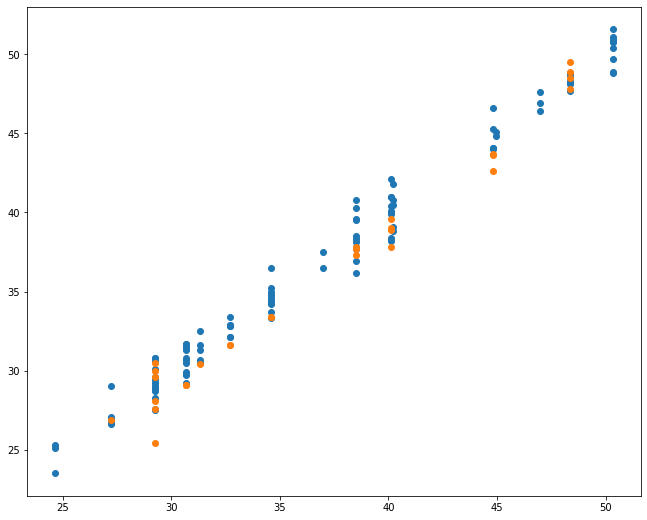

In [62]:
# Plot predicted against actual values

from matplotlib import pyplot as plt

# Use the best max_depth 
decision_tree = DecisionTreeRegressor(max_depth=4) # Fill in best max depth score here
decision_tree.fit(train_feature, train_target)

# Predict values for train and test
train_prediction = decision_tree.predict(train_feature)

MAE_train=np.mean(abs(train_target-train_prediction))/np.mean(test_target)
print("Tree on train set MAE%:", round(MAE_train*100,1))


test_prediction = decision_tree.predict(test_feature)
MAE_test=np.mean(abs(test_target-test_prediction))/np.mean(test_target)
print("Tree on test set MAE%:", round(MAE_test*100,1))


RsquareScoreTrain = decision_tree.score(train_feature, train_target)
RsquareScoreTest = decision_tree.score(test_feature, test_target)
result={'Model':'Decision Tree (80|20)',
        'Rsquare Train':[RsquareScoreTrain],
        'R-square Test':[RsquareScoreTest],
        'MAE Train':[round(MAE_train*100,1)],
        'MAE Test':[round(MAE_test*100,1)]}

# Scatter the predictions vs actual values, orange is predicted
plt.scatter(train_prediction, train_target, label='train')  # blue 
plt.scatter(test_prediction, test_target, label='test')  
plt.show()

### LSTM

In [63]:
# import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings 
warnings.filterwarnings("ignore")

Using TensorFlow backend.
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as

In [64]:
df

,occupancy
date,
1999-01-01,43.7
1999-02-01,41.0
1999-03-01,36.5
1999-04-01,32.8
1999-05-01,24.5
...,...
2011-02-01,47.8
2011-03-01,42.6
2011-04-01,37.7


In [65]:
df1 = df.occupancy.values
df1

array([43.7, 41. , 36.5, 32.8, 24.5, 24.1, 26. , 26.2, 30.7, 29.9, 35.2,
       33.8, 44.1, 41.8, 36.9, 34.3, 25.1, 23.5, 26.9, 26.9, 28.3, 31.5,
       36.5, 37.5, 47.7, 44.8, 40.8, 34.6, 27.1, 25.3, 28.9, 29.2, 30.5,
       32.8, 36.2, 37.8, 48.1, 46.6, 45.1, 36.5, 28.7, 26.7, 30.6, 29.8,
       31.7, 35. , 39.9, 40.3, 48.8, 48.8, 44. , 39.6, 29.4, 26.6, 31.3,
       29.9, 32.8, 35.2, 40. , 42.1, 50.4, 48.9, 45.3, 39.5, 30.1, 29. ,
       32.5, 30.8, 32.9, 34.2, 41. , 40.8, 50.9, 49.7, 46.4, 38.1, 29. ,
       29.6, 31.6, 29.7, 32.1, 33.3, 39.1, 38.8, 48.8, 48.7, 44.1, 37.7,
       29.2, 27.6, 30.7, 30.7, 32.9, 34.8, 41. , 40.4, 51.1, 51.6, 46.9,
       38.5, 30.8, 28.8, 31.7, 31.4, 33.4, 33.7, 40.5, 40.1, 50.8, 50.8,
       47.6, 38.3, 30.8, 27.5, 31.3, 30.5, 32.1, 34.4, 38.2, 38.4, 48.3,
       48.2, 43.6, 37.8, 30. , 25.4, 30.4, 29.1, 31.6, 33.4, 37.8, 39.6,
       49.5, 48.5, 43.7, 37.3, 28.1, 26.9, 30.5, 29.1, 31.6, 33.4, 38.9,
       39. , 48.9, 47.8, 42.6, 37.7, 29.6, 27.6])

In [66]:
df1 = df1.reshape(-1,1)
df1

array([[43.7],
       [41. ],
       [36.5],
       [32.8],
       [24.5],
       [24.1],
       [26. ],
       [26.2],
       [30.7],
       [29.9],
       [35.2],
       [33.8],
       [44.1],
       [41.8],
       [36.9],
       [34.3],
       [25.1],
       [23.5],
       [26.9],
       [26.9],
       [28.3],
       [31.5],
       [36.5],
       [37.5],
       [47.7],
       [44.8],
       [40.8],
       [34.6],
       [27.1],
       [25.3],
       [28.9],
       [29.2],
       [30.5],
       [32.8],
       [36.2],
       [37.8],
       [48.1],
       [46.6],
       [45.1],
       [36.5],
       [28.7],
       [26.7],
       [30.6],
       [29.8],
       [31.7],
       [35. ],
       [39.9],
       [40.3],
       [48.8],
       [48.8],
       [44. ],
       [39.6],
       [29.4],
       [26.6],
       [31.3],
       [29.9],
       [32.8],
       [35.2],
       [40. ],
       [42.1],
       [50.4],
       [48.9],
       [45.3],
       [39.5],
       [30.1],
       [29. ],
       [32

In [67]:
df1.dtype

dtype('float64')

In [68]:
# Scaling the data
scalar =MinMaxScaler()
df1=scalar.fit_transform(df1)

In [69]:
# Split into train and test
train = df1[:-45,:]
test = df1[-45:,:]

In [70]:
print(len(train), len(test))

105 45


In [71]:
# Building the 2D array for supervised learning
def create_data(sequence, time_stemp):
    dataX = []
    dataY = []
    for i in range(len(sequence)-time_stemp-1):
        a = sequence[i:(i+time_stemp), 0]
        dataX.append(a)
        dataY.append(sequence[i + time_stemp, 0])
    return np.array(dataX),  np.array(dataY)

In [72]:
time_stemp = 1

In [73]:
# Apply the 2D array function to train and test datasets
train_X, train_Y = create_data(train,time_stemp)
test_X, test_Y =create_data(test, time_stemp)

In [74]:
# transform input from [samples, features] to [samples, timesteps, features] basically from 2D to 3D
train_X = np.reshape(train_X, (train_X.shape[0],1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

In [75]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
#from tensorflow.keras import model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

### Adam Optimiser

In [76]:
# Build the LSTM Model
model = tensorflow.keras.Sequential()
# Adding the input layer and LSTM layer
model.add(tensorflow.keras.layers.LSTM(50, activation= 'relu', input_shape =(1,1)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer ='adam', loss='mse')
model.fit(train_X, train_Y, batch_size=4, epochs =80, verbose=2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/80
103/103 - 1s - loss: 0.2277
Epoch 2/80
103/103 - 0s - loss: 0.1802
Epoch 3/80
103/103 - 0s - loss: 0.1403
Epoch 4/80
103/103 - 0s - loss: 0.1105
Epoch 5/80
103/103 - 0s - loss: 0.0821
Epoch 6/80
103/103 - 0s - loss: 0.0623
Epoch 7/80
103/103 - 0s - loss: 0.0463
Epoch 8/80
103/103 - 0s - loss: 0.0416
Epoch 9/80
103/103 - 0s - loss: 0.0403
Epoch 10/80
103/103 - 0s - loss: 0.0376
Epoch 11/80
103/103 - 0s - loss: 0.0406
Epoch 12/80
103/103 - 0s - loss: 0.0410
Epoch 13/80
103/103 - 0s - loss: 0.0399
Epoch 14/80
103/103 - 0s - loss: 0.0411
Epoch 15/80
103/103 - 0s - loss: 0.0400
Epoch 16/80
103/103 - 0s - loss: 0.0375
Epoch 17/80
103/103 - 0s - loss: 0.0362
Epoch 18/80
103/103 - 0s - loss: 0.0340
Epoch 19/80
103/103 - 0s - loss: 0.0340
Epoch 20/80
103/103 - 0s - loss: 0.03

In [77]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)
# inverting predictions
train_predict = scalar.inverse_transform(train_predict)
train_Y_pred = scalar.inverse_transform([train_Y])
test_predict = scalar.inverse_transform(test_predict)
test_Y_pred = scalar.inverse_transform([test_Y])
# calculate root mean squared error
train_score1 = math.sqrt(mean_squared_error(train_Y_pred[0], train_predict[:,0]))
print('Train Score: %.3f RMSE' % (train_score1))
test_score1 = math.sqrt(mean_squared_error(test_Y_pred[0], test_predict[:,0]))
print('Test Score: %.3f RMSE' % (test_score1))

Train Score: 4.647 RMSE
Test Score: 4.955 RMSE


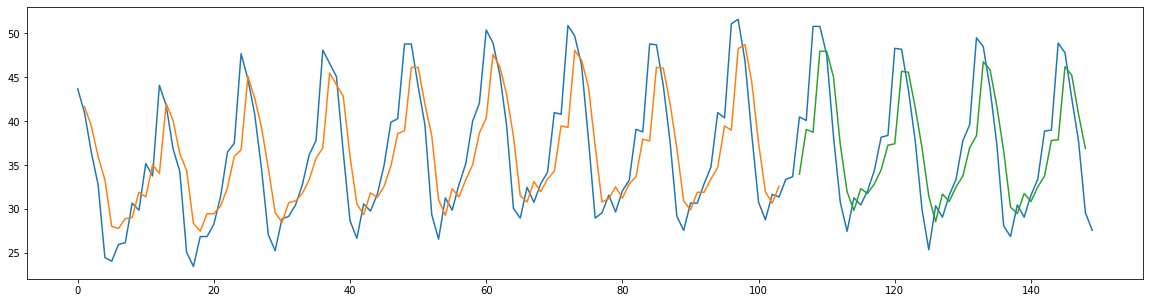

In [78]:
train_plot = np.empty_like(df1) # create an array with the same shape as provided
train_plot[:, :] = np.nan
train_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict
# shifting test predictions for plotting
test_plot = np.empty_like(df1)
test_plot[:, :] = np.nan
test_plot[len(train_predict)+(time_stemp*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
fig = plt.figure(figsize=(20,5))
plt.plot(scalar.inverse_transform(df1))
plt.plot(train_plot)
plt.plot(test_plot)
plt.show()